In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Downloads/loan.csv/loan.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.shape

(396030, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
obj_cols  = df.select_dtypes(include = 'O').columns

In [7]:
obj_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [8]:
df[obj_cols].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum().sort_values(ascending = False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

## xu ly cac cot co NaN

In [11]:
df.emp_title.value_counts()
# co hon 170k viec lam khac nhau!

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [12]:
df.emp_length.value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

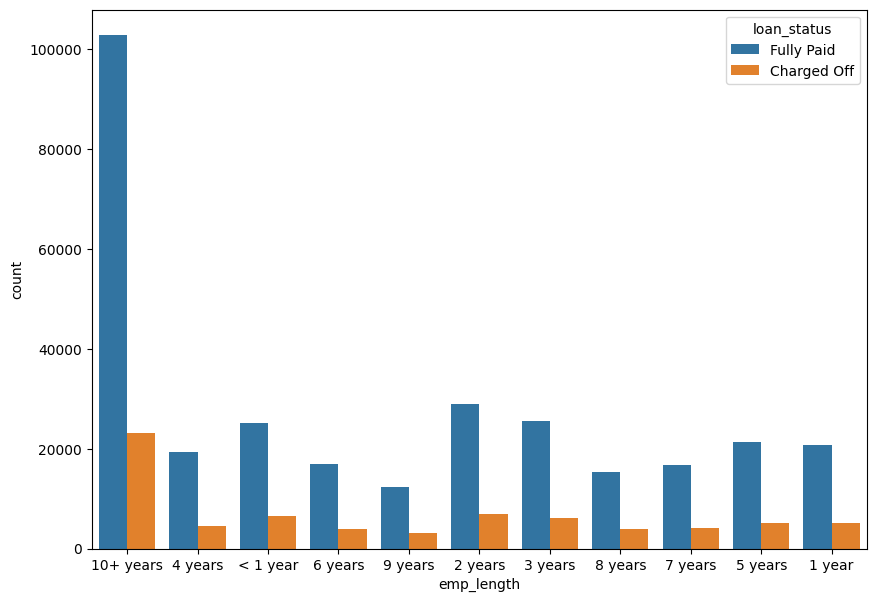

In [13]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'emp_length', hue = 'loan_status')

<AxesSubplot:xlabel='emp_length'>

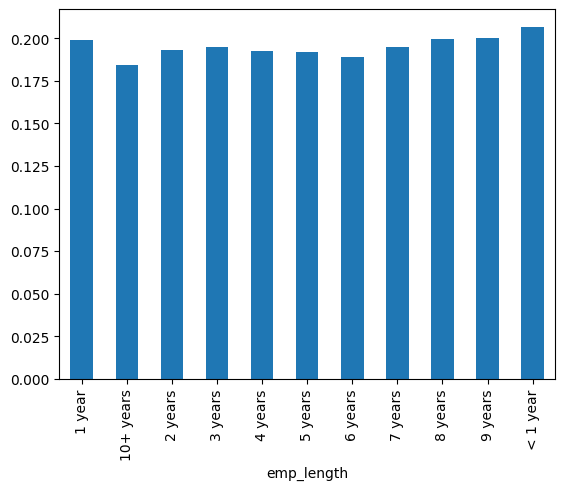

In [14]:
Fully_Paid = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
Charged_Off = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
x = Charged_Off/(Charged_Off + Fully_Paid)
x.plot(kind = 'bar')

In [15]:
#drop cot 'emp_title', emp_length - vi nhan thay no khong co gia tri du doan,
#dropna cot 'title', 'pub_rec_bankruptcies', 'revol_util' vi NaN nho

In [16]:
df = df.drop(['emp_title', 'emp_length'], axis = 1)

In [17]:
df.dropna(subset = ['title', 'pub_rec_bankruptcies', 'revol_util' ], inplace = True)

In [18]:
#fill NaN vao 2 cot 'mort_acc'

In [19]:
from sklearn.impute import SimpleImputer
impute_most_frequent = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
impute_mean = SimpleImputer(missing_values = np.NaN, strategy = 'mean')

In [20]:
df.mort_acc = impute_mean.fit_transform(df.mort_acc.values.reshape(-1,1))

In [21]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## kiem tra corr()

<AxesSubplot:>

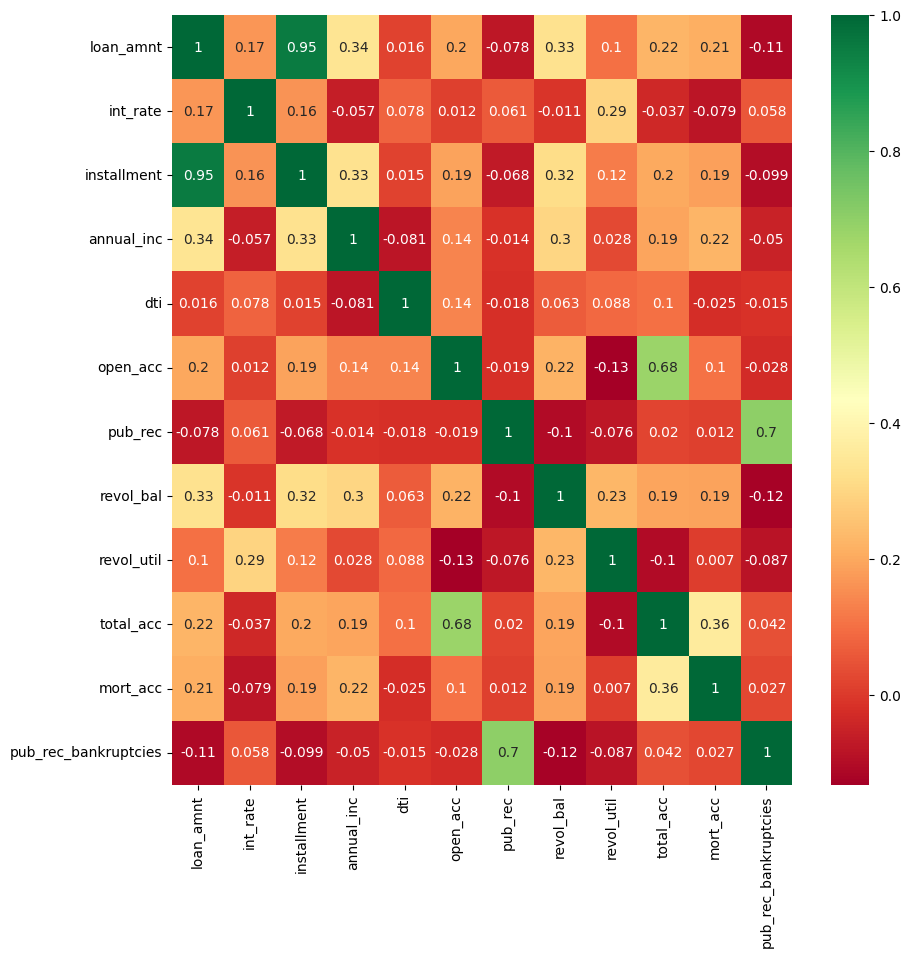

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap ='RdYlGn', annot = True)

In [23]:
#drop cac cot co tuong quan lon

In [24]:
df = df.drop(['loan_amnt', 'total_acc', 'pub_rec_bankruptcies'], axis = 1)

## xu ly cac cot dtype = object

In [25]:
obj_cols = df.select_dtypes('O').columns

In [26]:
obj_cols

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [27]:
# df.term

In [28]:
df.term.value_counts()
# chi co 2 gia tr 36 months va 60 months => chuyen thanh so thang

 36 months    300024
 60 months     93441
Name: term, dtype: int64

In [29]:
def split_term(x):
    s = x.strip().split(' ')
    return int(s[0])
# vi co khoang trang truoc gia tri nen can strip() roi moi split()

In [30]:
df.term = df.term.apply(split_term)

In [31]:
# df.grade va df.sub_grade

In [32]:
df.grade.value_counts()

B    115395
C    105253
A     63859
D     63044
E     31247
F     11647
G      3020
Name: grade, dtype: int64

In [33]:
df.sub_grade.value_counts()

B3    26518
B4    25471
C1    23507
C2    22439
B2    22381
B5    21954
C3    21075
C4    20113
B1    19071
A5    18447
C5    18119
D1    15861
A4    15716
D2    13841
D3    12139
D4    11580
A3    10509
A1     9683
D5     9623
A2     9504
E1     7860
E2     7371
E3     6147
E4     5334
E5     4535
F1     3512
F2     2727
F3     2258
F4     1766
F5     1384
G1     1050
G2      747
G3      546
G4      366
G5      311
Name: sub_grade, dtype: int64

In [34]:
#drop cot grade va dummies cot sub_grade

In [35]:
df.drop('grade', axis = 1, inplace = True)

In [36]:
dummy = pd.get_dummies(df.sub_grade, drop_first = True)

In [37]:
df = pd.concat([df.drop('sub_grade', axis = 1), dummy], axis = 1)

In [38]:
df.head()

,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,...,0,0,0,0,0,0,0,0,0,0
1,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,...,0,0,0,0,0,0,0,0,0,0
2,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,...,0,0,0,0,0,0,0,0,0,0
3,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,...,0,0,0,0,0,0,0,0,0,0
4,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#df.home_ownership

In [40]:
df.home_ownership.value_counts()

MORTGAGE    197110
RENT        158770
OWN          37443
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [41]:
df.home_ownership = df.home_ownership.replace(['OTHER', 'NONE', 'ANY'], 'RENT')
# 'OTHER', 'NONE', 'ANY' so luong it nen thay the bang 'RENT'

In [42]:
df.home_ownership.value_counts()

MORTGAGE    197110
RENT        158912
OWN          37443
Name: home_ownership, dtype: int64

In [43]:
dummy_home_ownership = pd.get_dummies(df.home_ownership, drop_first = True)

In [44]:
df = pd.concat([df.drop('home_ownership', axis = 1), dummy_home_ownership], axis = 1)

In [45]:
df.head()

,term,int_rate,installment,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,...,F3,F4,F5,G1,G2,G3,G4,G5,OWN,RENT
0,36,11.44,329.48,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,...,0,0,0,0,0,0,0,0,0,1
1,36,11.99,265.68,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,...,0,0,0,0,0,0,0,0,0,0
2,36,10.49,506.97,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,...,0,0,0,0,0,0,0,0,0,1
3,36,6.49,220.65,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,...,0,0,0,0,0,0,0,0,0,1
4,60,17.27,609.33,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# df.verification_status

In [47]:
df.verification_status.value_counts()

Verified           138867
Source Verified    130571
Not Verified       124027
Name: verification_status, dtype: int64

In [48]:
dummy_verification_status = pd.get_dummies(df.verification_status, drop_first = True)

In [49]:
df = pd.concat([df.drop('verification_status', axis = 1), dummy_verification_status], axis = 1)

In [50]:
# df.issue_d

In [51]:
df.issue_d.value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Nov-2007        1
Aug-2007        1
Name: issue_d, Length: 112, dtype: int64

In [52]:
# ngay phat hanh khoan vay => drop
df = df.drop('issue_d', axis = 1)

In [53]:
# df.loan_status

In [54]:
df.loan_status.value_counts()

Fully Paid     316271
Charged Off     77194
Name: loan_status, dtype: int64

In [55]:
# co hien tuong imbalace data tuy nhien xu ly sau

In [56]:
data = df.copy()

In [57]:
#df = data.copy()

In [58]:
df.loan = df.loan_status.map({'Fully Paid' : 1,
                              'Charged Off' : 0})

In [59]:
df.loan_status = df.loan

In [60]:
# df.purpose

In [61]:
df.purpose.value_counts()

debt_consolidation    233108
credit_card            82577
home_improvement       23836
other                  20976
major_purchase          8713
small_business          5627
car                     4656
medical                 4152
moving                  2835
vacation                2431
house                   2190
wedding                 1794
renewable_energy         326
educational              244
Name: purpose, dtype: int64

In [62]:
def trans_purpose(x):
    if x == 'debt_consolidation' or  x == 'credit_card' or x == 'home_improvement' :
        return x
    else:
        return 'other'

In [63]:
df.purpose = df.purpose.apply(trans_purpose)

In [64]:
dummy_purpose = pd.get_dummies(df.purpose, drop_first = True)

In [65]:
df = pd.concat([df.drop('purpose', axis = 1), dummy_purpose], axis = 1)

In [66]:
df.head()

,term,int_rate,installment,annual_inc,loan_status,title,dti,earliest_cr_line,open_acc,pub_rec,...,G3,G4,G5,OWN,RENT,Source Verified,Verified,debt_consolidation,home_improvement,other
0,36,11.44,329.48,117000.0,1,Vacation,26.24,Jun-1990,16.0,0.0,...,0,0,0,0,1,0,0,0,0,1
1,36,11.99,265.68,65000.0,1,Debt consolidation,22.05,Jul-2004,17.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,36,10.49,506.97,43057.0,1,Credit card refinancing,12.79,Aug-2007,13.0,0.0,...,0,0,0,0,1,1,0,0,0,0
3,36,6.49,220.65,54000.0,1,Credit card refinancing,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,17.27,609.33,55000.0,0,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
# df.title

In [68]:
df.title.value_counts()

Debt consolidation            152392
Credit card refinancing        51476
Home improvement               15245
Other                          12910
Debt Consolidation             11584
                               ...  
PayOffHighIntCreditCards           1
Heat my home                       1
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
Toxic Debt Payoff                  1
Name: title, Length: 48472, dtype: int64

In [69]:
df = df.drop('title', axis = 1)

In [70]:
# df.earliest_cr_line
#Trong ngữ cảnh báo cáo tín dụng và điểm tín dụng, "earliest_cr_line" thường đề cập đến ngày cá nhân mở tài khoản tín dụng lâu đời nhất của họ. Đây có thể là thẻ tín dụng, khoản vay hoặc bất kỳ công cụ tín dụng nào khác mà cá nhân đó đã sử dụng trong quá khứ. Thông tin "earliest_cr_line" thường được các văn phòng tín dụng và người cho vay sử dụng để đánh giá mức độ tin cậy và lịch sử thanh toán.

In [71]:
df.earliest_cr_line.value_counts()

Oct-2000    2999
Aug-2000    2911
Oct-2001    2878
Aug-2001    2869
Nov-2000    2723
            ... 
Apr-1960       1
Jul-1958       1
Nov-1957       1
Jul-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 683, dtype: int64

In [72]:
def split_earliest_cr_line(x):
    s = str(x).strip().split('-')
    if len(s) == 2:
        return int(s[1])
    else:
        return x

In [73]:
data1 = df.copy()

In [74]:
data1.earliest_cr_line = data1.earliest_cr_line.apply(split_earliest_cr_line)

In [75]:
data1.head()

,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,G3,G4,G5,OWN,RENT,Source Verified,Verified,debt_consolidation,home_improvement,other
0,36,11.44,329.48,117000.0,1,26.24,1990,16.0,0.0,36369.0,...,0,0,0,0,1,0,0,0,0,1
1,36,11.99,265.68,65000.0,1,22.05,2004,17.0,0.0,20131.0,...,0,0,0,0,0,0,0,1,0,0
2,36,10.49,506.97,43057.0,1,12.79,2007,13.0,0.0,11987.0,...,0,0,0,0,1,1,0,0,0,0
3,36,6.49,220.65,54000.0,1,2.60,2006,6.0,0.0,5472.0,...,0,0,0,0,1,0,0,0,0,0
4,60,17.27,609.33,55000.0,0,33.95,1999,13.0,0.0,24584.0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
# data1.initial_list_status

In [77]:
data1.initial_list_status.value_counts()
#"initial_list_status" là "w" hoặc "f". Chữ "w" là viết tắt của toàn bộ khoản vay, có nghĩa là khoản vay được cung cấp toàn bộ cho các nhà đầu tư. Chữ "f" là viết tắt của khoản vay phân đoạn, có nghĩa là khoản vay được chia thành các khoản vay tương đối nhỏ hơn và được cung cấp cho các nhà đầu tư.

f    236947
w    156518
Name: initial_list_status, dtype: int64

In [78]:
dummy_initial_list_status = pd.get_dummies(data1.initial_list_status, drop_first = True)

In [79]:
data1 = pd.concat([data1.drop('initial_list_status', axis = 1), dummy_initial_list_status], axis = 1)

In [80]:
data1.head()

,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,G4,G5,OWN,RENT,Source Verified,Verified,debt_consolidation,home_improvement,other,w
0,36,11.44,329.48,117000.0,1,26.24,1990,16.0,0.0,36369.0,...,0,0,0,1,0,0,0,0,1,1
1,36,11.99,265.68,65000.0,1,22.05,2004,17.0,0.0,20131.0,...,0,0,0,0,0,0,1,0,0,0
2,36,10.49,506.97,43057.0,1,12.79,2007,13.0,0.0,11987.0,...,0,0,0,1,1,0,0,0,0,0
3,36,6.49,220.65,54000.0,1,2.60,2006,6.0,0.0,5472.0,...,0,0,0,1,0,0,0,0,0,0
4,60,17.27,609.33,55000.0,0,33.95,1999,13.0,0.0,24584.0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
# data1.application_type

In [82]:
data1.application_type.value_counts()
#"application_type" đề cập đến cách người vay đăng ký khoản vay và nó đóng vai trò quan trọng trong việc xác định các điều khoản và điều kiện của khoản vay.
#Có hai loại đơn xin vay chính:
#Đơn đăng ký cá nhân: Đơn đăng ký cá nhân được nộp bởi một người vay duy nhất chịu trách nhiệm hoàn toàn về khoản vay. Mức độ tin cậy về tín dụng, thu nhập và các thông tin tài chính khác của người đi vay được đánh giá để xác định khả năng đủ điều kiện cho khoản vay của họ.
#Đơn đăng ký chung: Một đơn đăng ký chung được nộp bởi hai hoặc nhiều người vay, những người cùng chịu trách nhiệm về khoản vay. Người cho vay đánh giá mức độ tín nhiệm, thu nhập và các thông tin tài chính khác của tất cả những người vay trong đơn đăng ký để xác định khả năng đủ điều kiện cho vay.

INDIVIDUAL    392844
JOINT            356
DIRECT_PAY       265
Name: application_type, dtype: int64

In [83]:
dummy_application_type = pd.get_dummies(data1.application_type, drop_first = True)

In [84]:
data1 = pd.concat([data1.drop('application_type',axis = 1), dummy_application_type], axis = 1)

In [85]:
data1.head()

,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,OWN,RENT,Source Verified,Verified,debt_consolidation,home_improvement,other,w,INDIVIDUAL,JOINT
0,36,11.44,329.48,117000.0,1,26.24,1990,16.0,0.0,36369.0,...,0,1,0,0,0,0,1,1,1,0
1,36,11.99,265.68,65000.0,1,22.05,2004,17.0,0.0,20131.0,...,0,0,0,0,1,0,0,0,1,0
2,36,10.49,506.97,43057.0,1,12.79,2007,13.0,0.0,11987.0,...,0,1,1,0,0,0,0,0,1,0
3,36,6.49,220.65,54000.0,1,2.60,2006,6.0,0.0,5472.0,...,0,1,0,0,0,0,0,0,1,0
4,60,17.27,609.33,55000.0,0,33.95,1999,13.0,0.0,24584.0,...,0,0,0,1,0,0,0,0,1,0


In [86]:
# data1.address

In [87]:
data1.address.head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [88]:
data1 = data1.drop('address', axis = 1)

In [89]:
data1.head()

,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,OWN,RENT,Source Verified,Verified,debt_consolidation,home_improvement,other,w,INDIVIDUAL,JOINT
0,36,11.44,329.48,117000.0,1,26.24,1990,16.0,0.0,36369.0,...,0,1,0,0,0,0,1,1,1,0
1,36,11.99,265.68,65000.0,1,22.05,2004,17.0,0.0,20131.0,...,0,0,0,0,1,0,0,0,1,0
2,36,10.49,506.97,43057.0,1,12.79,2007,13.0,0.0,11987.0,...,0,1,1,0,0,0,0,0,1,0
3,36,6.49,220.65,54000.0,1,2.60,2006,6.0,0.0,5472.0,...,0,1,0,0,0,0,0,0,1,0
4,60,17.27,609.33,55000.0,0,33.95,1999,13.0,0.0,24584.0,...,0,0,0,1,0,0,0,0,1,0


In [90]:
float_cols = data1.select_dtypes(include = 'float').columns

In [91]:
float_cols

Index(['int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'mort_acc'],
      dtype='object')

In [92]:
# chia tach tap X va y

In [93]:
predictor = data1.drop('loan_status', axis = 1).columns.values

In [94]:
X = data1[predictor]
y = data1['loan_status']

In [95]:
y

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 393465, dtype: int64

In [96]:
y.value_counts()

1    316271
0     77194
Name: loan_status, dtype: int64

## scale data va chia train, test

In [97]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X[predictor] = scale.fit_transform(X)

In [98]:
X.head()

,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,...,OWN,RENT,Source Verified,Verified,debt_consolidation,home_improvement,other,w,INDIVIDUAL,JOINT
0,0.0,0.238411,0.206493,0.013438,0.002624,0.666667,0.168539,0.0,0.020863,0.046845,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,0.259836,0.164456,0.007466,0.002205,0.869565,0.179775,0.0,0.011548,0.059733,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.201402,0.323437,0.004945,0.001279,0.913043,0.134831,0.0,0.006876,0.103328,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.045578,0.134787,0.006202,0.000260,0.898551,0.056180,0.0,0.003139,0.024095,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.465524,0.390880,0.006317,0.003395,0.797101,0.134831,0.0,0.014102,0.078225,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [100]:
X_train.shape, X_test.shape

((314772, 55), (78693, 55))

## xu ly imbalance data

In [101]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [102]:
y_train_resample.value_counts()

0    253302
1    253302
Name: loan_status, dtype: int64

# Logistic Regression

In [103]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [104]:
model_log = LogisticRegression()
model_log.fit(X_train_resample, y_train_resample)
y_pred_log = model_log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.31      0.67      0.43     15724
           1       0.88      0.63      0.74     62969

    accuracy                           0.64     78693
   macro avg       0.60      0.65      0.58     78693
weighted avg       0.77      0.64      0.68     78693



# XGBoost

In [108]:

import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train_resample, y_train_resample)

y_pred = model_xgb.predict(X_test)

# In bao cao ket qua
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.11      0.19     15724
           1       0.81      0.97      0.89     62969

    accuracy                           0.80     78693
   macro avg       0.67      0.54      0.54     78693
weighted avg       0.76      0.80      0.75     78693



# Decision Tree


In [107]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train_resample, y_train_resample)

y_pred_dtree = dtree.predict(X_test)
print(classification_report( y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.27      0.32      0.29     15724
           1       0.82      0.78      0.80     62969

    accuracy                           0.69     78693
   macro avg       0.54      0.55      0.55     78693
weighted avg       0.71      0.69      0.70     78693



#  XGBoosst 2

In [106]:
import xgboost as xgb
model_xgb_1 = xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=100,
 max_depth=10,
 min_child_weight=50,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic')
model_xgb_1.fit(X_train_resample, y_train_resample)

y_pred = model_xgb_1.predict(X_test)

# In bao cao ket qua
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.11      0.18     15724
           1       0.81      0.97      0.89     62969

    accuracy                           0.80     78693
   macro avg       0.66      0.54      0.54     78693
weighted avg       0.75      0.80      0.75     78693

